In [29]:
import pandas as pd
import numpy as np
import random

np.random.seed(42)

# =========================
# CONFIGURATION
# =========================
NUM_ROWS = 5000   # 🔥 change to 10000 / 20000 / 50000 if needed

platforms = ["Twitter", "Instagram", "Facebook", "LinkedIn", "YouTube"]
regions = ["India", "USA", "UK", "Canada", "Australia"]
user_types = ["Normal User", "Influencer", "Brand"]

positive_texts = [
    "Love the new update", "Amazing experience", "Fantastic design",
    "Excellent service", "Best app ever", "Very smooth performance",
    "Highly satisfied", "User friendly interface", "Outstanding quality"
]

negative_texts = [
    "Worst experience ever", "Very disappointing", "App keeps crashing",
    "Terrible update", "Poor performance", "Horrible UI",
    "Buggy and slow", "Not happy with this", "Needs urgent fix"
]

neutral_texts = [
    "App is okay", "Average experience", "Nothing special",
    "Works as expected", "Fair enough", "No major changes",
    "Decent update", "Neutral feedback"
]

hashtags = [
    "#update", "#newrelease", "#tech", "#app", "#review",
    "#feedback", "#trending", "#viral", "#software", "#digital"
]

# =========================
# DATA GENERATION
# =========================
sentiment_choices = (
    ["Positive"] * 45 +
    ["Negative"] * 30 +
    ["Neutral"] * 25
)

sentiments = np.random.choice(sentiment_choices, NUM_ROWS)

post_texts = []
for s in sentiments:
    if s == "Positive":
        post_texts.append(random.choice(positive_texts))
    elif s == "Negative":
        post_texts.append(random.choice(negative_texts))
    else:
        post_texts.append(random.choice(neutral_texts))

likes = np.random.randint(5, 1500, NUM_ROWS)
comments = np.random.randint(0, 400, NUM_ROWS)
shares = np.random.randint(0, 300, NUM_ROWS)

data = {
    "platform": np.random.choice(platforms, NUM_ROWS),
    "region": np.random.choice(regions, NUM_ROWS),
    "user_type": np.random.choice(user_types, NUM_ROWS),
    "post_text": post_texts,
    "hashtags": np.random.choice(hashtags, NUM_ROWS),
    "likes": likes,
    "comments": comments,
    "shares": shares
}

df = pd.DataFrame(data)

# =========================
# SAVE DATASET
# =========================
df.to_csv("social_media_data_vast.csv", index=False)

df.head()


,platform,region,user_type,post_text,hashtags,likes,comments,shares
0,Instagram,Australia,Brand,Very disappointing,#viral,885,342,71
1,Instagram,Australia,Influencer,Works as expected,#feedback,1241,339,112
2,YouTube,USA,Normal User,Best app ever,#review,833,202,106
3,YouTube,Canada,Normal User,Buggy and slow,#feedback,141,184,289
4,YouTube,Australia,Influencer,Not happy with this,#trending,1034,120,116


**import**

Meaning: Loads external libraries

Use case: Python does not have CSV handling by default


**pandas**

Meaning: Data analysis library

Use case: Used to create, read, and manipulate tabular data

**as pd**

Meaning: Alias (short name)

Use case: Industry standard, saves typing

**data**

Meaning: Python dictionary

Use case: Temporary storage before converting to DataFrame

**{ }**

Meaning: Dictionary structure

Use case: Key → column name, Value → column data

**pd.DataFrame()**

Meaning: Converts data into table format

Use case: Creates rows & columns like Excel

**df**

Meaning: DataFrame variable

Use case: Stores the dataset for analysis

**to_csv()**





**index=False**

Meaning: Excludes row numbers

Use case: Clean dataset without extra column

**head()**

Meaning: Shows first 5 rows

Use case: Quick verification of data



# Libraries Required


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk

sns.set(style="whitegrid")




**Meaning: Plotting module**

Use case: Creates charts & graphs

**as plt**

Meaning: Alias for pyplot

Use case: Industry standard

**seaborn**

Meaning: Statistical visualization library

Use case: Better-looking plots for EDA

**sns.set()**

Meaning: Sets plot theme

Use case: Professional visuals

**from textblob import TextBlob**

Meaning: Imports sentiment tool

Use case: NLP-based emotion detection

# Load Excel


In [44]:
df = pd.read_csv("social_media_data_vast.csv")
df.head()


,platform,region,user_type,post_text,hashtags,likes,comments,shares
0,Instagram,Australia,Brand,Very disappointing,#viral,885,342,71
1,Instagram,Australia,Influencer,Works as expected,#feedback,1241,339,112
2,YouTube,USA,Normal User,Best app ever,#review,833,202,106
3,YouTube,Canada,Normal User,Buggy and slow,#feedback,141,184,289
4,YouTube,Australia,Influencer,Not happy with this,#trending,1034,120,116


**read_csv()**

Meaning: Reads CSV file

Use case: Load real-world datasets

**"social_media_data.csv"**

Meaning: File name

Use case: Input data source

**df**

Meaning: Stores loaded dataset

Use case: Central object for analysis


In [45]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   platform   5000 non-null   object
 1   region     5000 non-null   object
 2   user_type  5000 non-null   object
 3   post_text  5000 non-null   object
 4   hashtags   5000 non-null   object
 5   likes      5000 non-null   int64 
 6   comments   5000 non-null   int64 
 7   shares     5000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 312.6+ KB


In [46]:
df.describe()


,likes,comments,shares
count,5000.000000,5000.000000,5000.00000
mean,758.055400,198.260200,150.16420
std,427.987282,115.900068,87.01132
min,5.000000,0.000000,0.00000
25%,390.000000,94.000000,75.00000
50%,762.000000,199.000000,151.00000
75%,1127.000000,299.000000,226.00000
max,1499.000000,399.000000,299.00000


**Meaning: Descriptive statistics**

Shows: mean, min, max, count

Use case: Identify trends & outliers


# Data Cleaning


In [47]:
# Clean text
df["post_text"] = df["post_text"].str.lower()


**["post_text"]**

Meaning: Column access

Use case: Select specific feature

**str**

Meaning: String methods accessor

Use case: Apply text functions

**lower()**

Meaning: Converts text to lowercase

Use case: Text normalization for NLP

# Sentiment Anlaysis Function


In [48]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["post_text"].apply(get_sentiment)

df[["post_text", "sentiment"]].head()


,post_text,sentiment
0,very disappointing,Negative
1,works as expected,Negative
2,best app ever,Positive
3,buggy and slow,Negative
4,not happy with this,Negative


**def**

Meaning: Defines a function

Use case: Reusable logic

**text**

Meaning: Function parameter

Use case: Holds post content

**TextBlob(text)**

Meaning: NLP processing object

Use case: Analyze emotions

**sentiment.polarity**

Meaning: Score between -1 and +1

Use case: Emotion strength

**if / elif / else**

Meaning: Conditional logic

Use case: Sentiment classification

**return**

Meaning: Output from function

Use case: Store sentiment label

# Engagement Metric

In [49]:
df["engagement"] = df["likes"] + df["comments"] + df["shares"]
df.head()

,platform,region,user_type,post_text,hashtags,likes,comments,shares,sentiment,engagement
0,Instagram,Australia,Brand,very disappointing,#viral,885,342,71,Negative,1298
1,Instagram,Australia,Influencer,works as expected,#feedback,1241,339,112,Negative,1692
2,YouTube,USA,Normal User,best app ever,#review,833,202,106,Positive,1141
3,YouTube,Canada,Normal User,buggy and slow,#feedback,141,184,289,Negative,614
4,YouTube,Australia,Influencer,not happy with this,#trending,1034,120,116,Negative,1270


**engagement**

Meaning: Custom metric

Use case: Measures post performance



# Count Plot

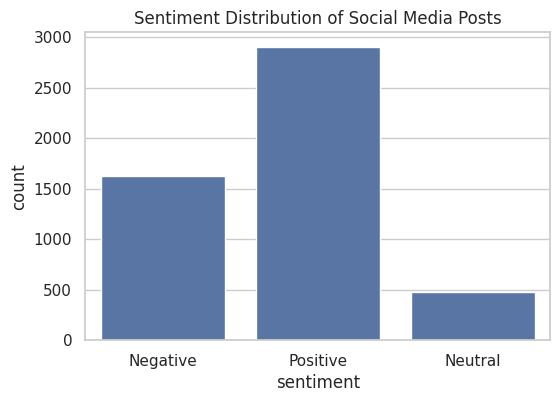

In [50]:
plt.figure(figsize=(6,4))
sns.countplot(x="sentiment", data=df)
plt.title("Sentiment Distribution of Social Media Posts")
plt.show()


# Bar Plot

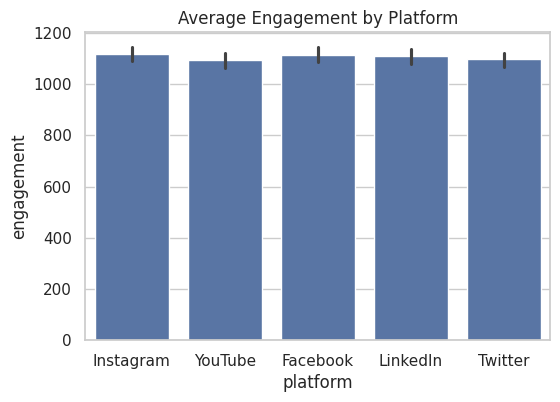

In [51]:
plt.figure(figsize=(6,4))
sns.barplot(x="platform", y="engagement", data=df)
plt.title("Average Engagement by Platform")
plt.show()


# Box Plot

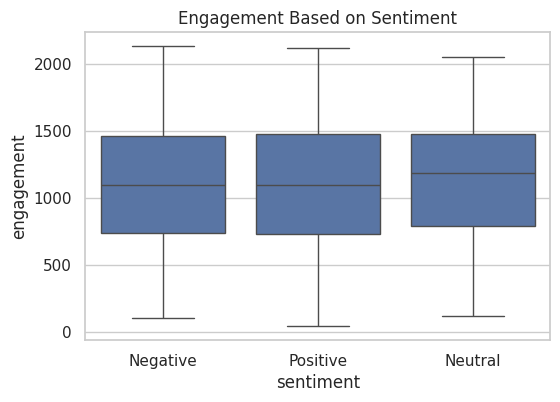

In [52]:
plt.figure(figsize=(6,4))
sns.boxplot(x="sentiment", y="engagement", data=df)
plt.title("Engagement Based on Sentiment")
plt.show()


# Sorting

In [53]:
top_posts = df.sort_values(by="engagement", ascending=False).head(5)
top_posts


,platform,region,user_type,post_text,hashtags,likes,comments,shares,sentiment,engagement
2048,Instagram,UK,Influencer,worst experience ever,#viral,1495,358,278,Negative,2131
1501,Facebook,UK,Normal User,outstanding quality,#tech,1476,349,294,Positive,2119
4055,LinkedIn,Canada,Normal User,amazing experience,#software,1465,378,271,Positive,2114
4432,Instagram,USA,Brand,fantastic design,#update,1484,342,276,Positive,2102
4028,Twitter,USA,Influencer,highly satisfied,#app,1434,368,292,Positive,2094


# Seaborn Analysis

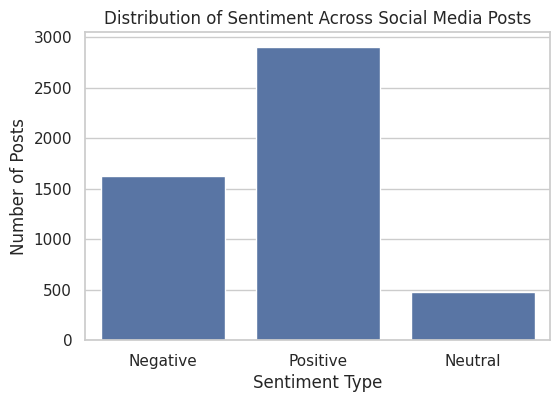

In [54]:
plt.figure(figsize=(6,4))
sns.countplot(x="sentiment", data=df)
plt.title("Distribution of Sentiment Across Social Media Posts")
plt.xlabel("Sentiment Type")
plt.ylabel("Number of Posts")
plt.show()


# Numpy Metric

In [55]:
likes_arr = np.array(df["likes"])
comments_arr = np.array(df["comments"])
shares_arr = np.array(df["shares"])

In [56]:
engagement_np = likes_arr + comments_arr + shares_arr
df["engagement_np"] = engagement_np
df.head()


,platform,region,user_type,post_text,hashtags,likes,comments,shares,sentiment,engagement,engagement_np
0,Instagram,Australia,Brand,very disappointing,#viral,885,342,71,Negative,1298,1298
1,Instagram,Australia,Influencer,works as expected,#feedback,1241,339,112,Negative,1692,1692
2,YouTube,USA,Normal User,best app ever,#review,833,202,106,Positive,1141,1141
3,YouTube,Canada,Normal User,buggy and slow,#feedback,141,184,289,Negative,614,614
4,YouTube,Australia,Influencer,not happy with this,#trending,1034,120,116,Negative,1270,1270


Shows NumPy vectorized operations

Faster than Python loops

Reinforces feature engineering

# Correlation using numpy

In [57]:
np.corrcoef(likes_arr, comments_arr)


array([[ 1.        , -0.00565811],
       [-0.00565811,  1.        ]])

**Meaning**

Measures relationship between likes and comments

Value range: -1 to +1

**Real-world use**

Engagement behavior analysis

Feature selection for ML

In [59]:
!git clone https://github.com/weeb999/SocialMediaSentiment.git

Cloning into 'SocialMediaSentiment'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), done.


In [62]:
%cd SocialMediaSentiment


/content/SocialMediaSentiment


In [63]:
!ls


README.md


In [64]:
!git clone https://github.com/weeb999/SocialMediaSentiment.git
%cd SocialMediaSentiment
!git status


Cloning into 'SocialMediaSentiment'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), done.
/content/SocialMediaSentiment/SocialMediaSentiment
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [70]:
!cp /content/social_media_data_vast.csv .


In [76]:
!cp /content/*.ipynb .


cp: cannot stat '/content/*.ipynb': No such file or directory
